In [2]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [2]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift()

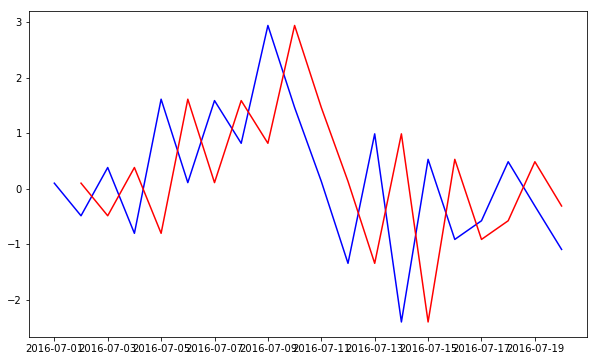

In [3]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

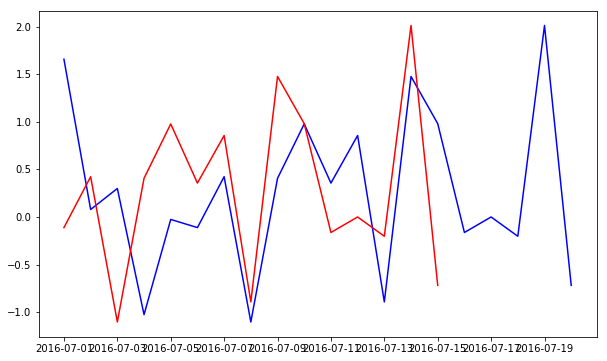

In [5]:
# %load snippets/shift_future.py
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift(-5)
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

# Window functions give you moving aggregate measures of a time series

In [9]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [6]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

In [7]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

In [8]:
df.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2017-12-12', '2017-12-13', '2017-12-14', '2017-12-15',
               '2017-12-16', '2017-12-17', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21'],
              dtype='datetime64[ns]', length=600, freq='D')

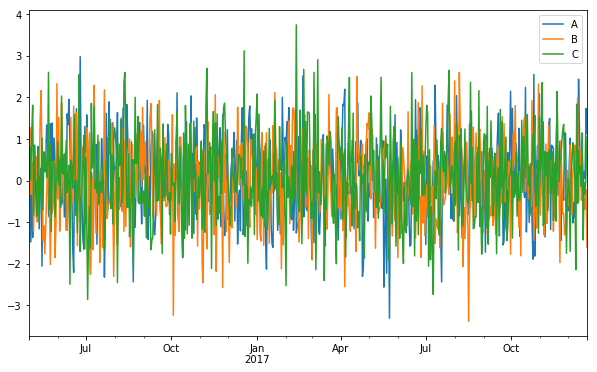

In [9]:
df.plot()

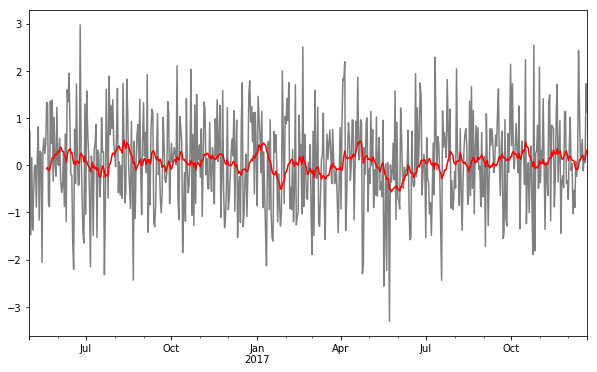

In [10]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

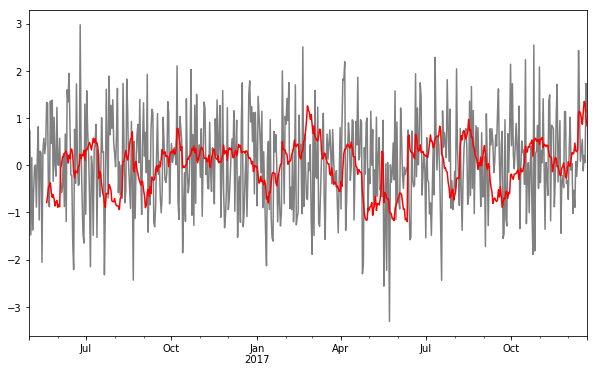

In [11]:
df['A'].plot(color = 'gray')
r.skew()['A'].plot(color = 'red')

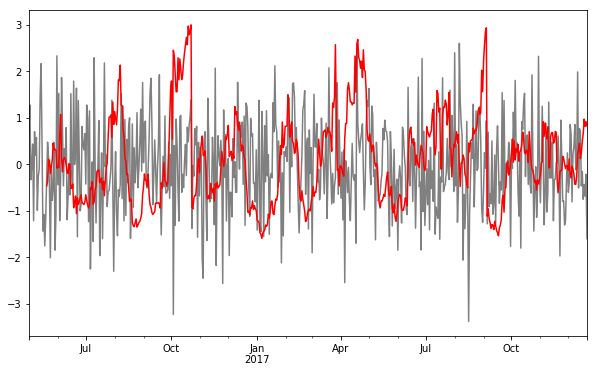

In [12]:
df['B'].plot(color = 'gray')
r.kurt()['B'].plot(color = 'red')

### What about a custom function?

In [17]:
# %load snippets/custom_rolling.py
#df.rolling(window = 10, center = False).apply(lambda x: x[1]/x[2])[1:10]
#df.rolling(window = 10, center = False).apply(lambda x: x[1]/x[2])[10:30]
df.rolling(window = 10, center = False).apply(lambda x: x[0] - x[-1])[10:30]

,A,B,C
2016-05-11,-0.100133,1.543977,0.041606
2016-05-12,-0.315406,-0.223919,0.997711
2016-05-13,-0.134488,-1.433321,1.038997
2016-05-14,-1.633811,-1.728720,2.206655
2016-05-15,1.478231,-1.741161,-1.854425
2016-05-16,-0.329135,2.138645,1.560444
2016-05-17,-0.568389,1.275134,-0.673857
2016-05-18,-1.131814,2.331196,-0.265318
2016-05-19,-0.242535,0.158271,-1.470296
2016-05-20,-0.516823,0.025058,0.678569


### What if I want to generate a rolling window function of monthly data from daily data?

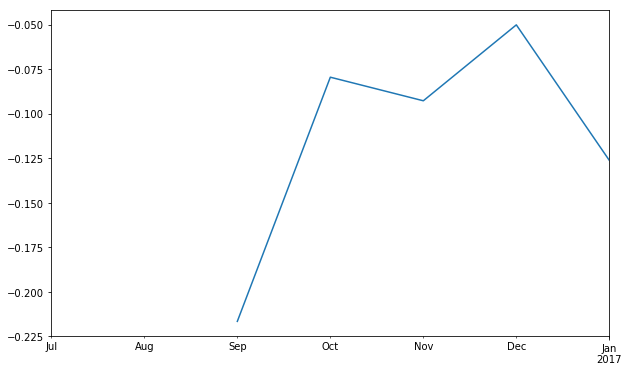

In [14]:
# %load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))
ts_long.resample('M').mean().rolling(window = 3).mean().plot()

## Expanding windows

In [18]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,0.746621,1.004496,0.440926
2016-05-03,0.005597,0.556774,0.299001
2016-05-04,0.044739,0.418322,0.512484
2016-05-05,-0.238677,0.420622,0.771889


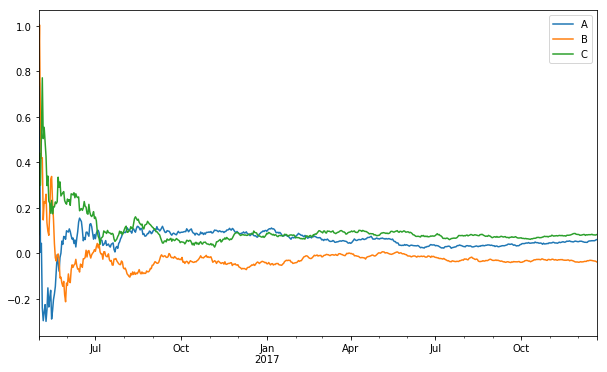

In [19]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

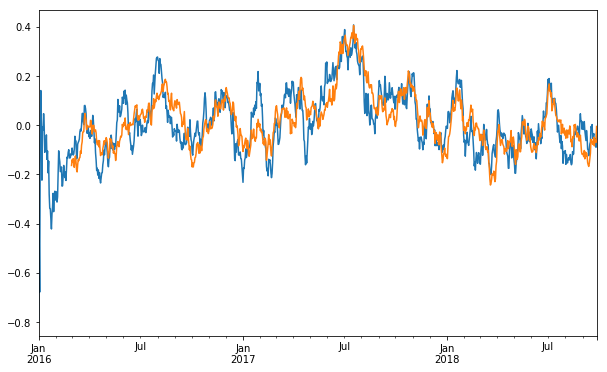

In [3]:
# %load snippets/window_funcs_try.py
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot()

In [4]:
# 2. when old data is just as relevant as new data; when things back in time still count for a lot

In [6]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,NaN,NaN,NaN


In [8]:
r = df.rolling(window = 20)
r.agg(['sum', 'count']).tail()

A               B               C      
                 sum count       sum count       sum count
2017-12-17 -3.508920  20.0  3.313767  20.0  0.883862  20.0
2017-12-18 -3.057679  20.0  1.472093  20.0  0.597738  20.0
2017-12-19 -0.341886  20.0  2.425069  20.0  0.750848  20.0
2017-12-20 -0.148675  20.0  1.583401  20.0  2.498567  20.0
2017-12-21  1.895920  20.0  3.081241  20.0  3.805684  20.0